# Identifying Treatment for diseases in the medical records

In [ ]:
# We need to install the required packages and libraries

In [ ]:
!pip install pycrf
!pip install sklearn-crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pycrf: filename=pycrf-0.0.1-py3-none-any.whl size=1897 sha256=04e150ea7a36f6d0c78efd9f2e6eab32d387f8a9a95170bffdc3e6359c84b1f5
  Stored in directory: /root/.cache/pip/wheels/0b/68/37/a457e156cfd6174ed28c9c8cb76f18eeb559b760d84c0a22eb
Successfully built pycrf
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 7.0 MB/s 


In [ ]:
import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics
import pandas as pd
from tqdm import tqdm
from spacy import displacy

model = spacy.load("en_core_web_sm", disable=['ner'])


In [ ]:
# Data Preprocessing
# The data given is in the form of one word per line in the csv file.
# Given are csv files, train sent with one word per line and train sent label with labels per for each and evry word


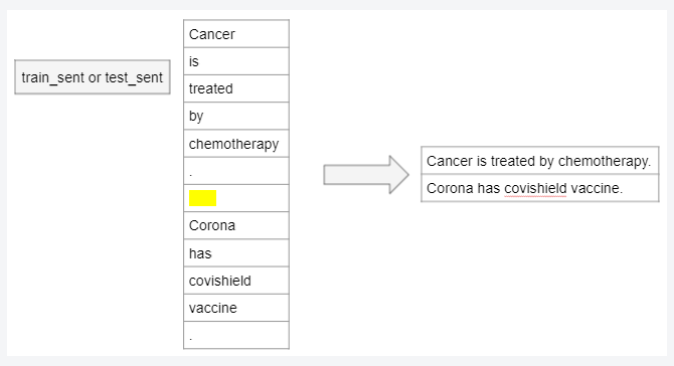

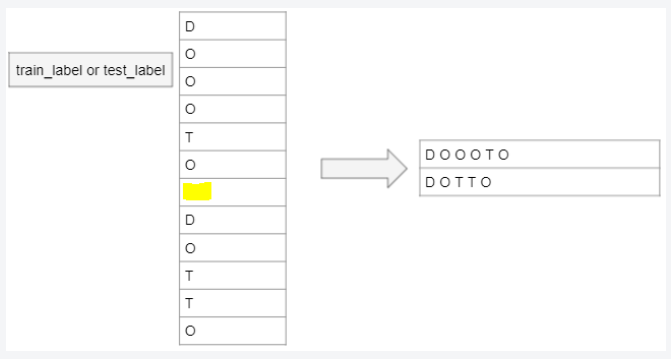

In [ ]:
def form_sentence(wordlist, seperator):
    sentence = ""
    #print(wordlist)
    for count in range(len(wordlist)):
        if count == 0:
            sentence = wordlist[count]
        else:
            sentence = sentence + seperator +wordlist[count]
    return sentence


In [ ]:
def load_input_data(filepath, seperator):
    with open(filepath, 'r') as file_handler:
        input_data = file_handler.readlines()
    wordlist = []
    sentences = []
    for word in input_data:
        #print(word)
        word = word.strip(seperator)
        #print(word)
        if word == '':
            #print(wordlist)
            if wordlist:
                sentences.append(form_sentence(wordlist=wordlist, seperator=' '))
                del wordlist
                wordlist = []
        else:
            #print(wordlist)
            wordlist.append(word)
    return sentences


In [ ]:
def get_sent_pos_df(sentences, labels):
    sent_pos_df = pd.DataFrame(columns=['sent_idx', 'word', 'pos', 'lemma', 'label'])
    sent_idx = 0
    row = 0
    for sentence, label in tqdm(zip(sentences, labels)):
        #processed_doc = model(sentence)
        sent_idx+=1
        for word, char_lbl in zip(sentence.split(), label.split()):
            doc = model(word)
            for token in doc:
                sent_pos_df.loc[row, ['sent_idx', 'word', 'pos', 'lemma', 'label']] = [sent_idx, token.text, token.pos_, token.lemma_, char_lbl]
                row+=1
    return sent_pos_df


In [ ]:
##Constructing proper sentences from individual words

In [ ]:
# As we need to import the train and test data, we have changed the working dorectory for the ease of importing
# Using the google drive to mount the google drive and setting the relevant working directory

In [ ]:
%cd /content/drive/MyDrive/Syntactic Processing Assignment

/content/drive/MyDrive/Syntactic Processing Assignment


In [ ]:
# Load the train sentences data and print the total sentneces and sample sentences
train_sents = load_input_data(filepath = 'train_sent.csv',seperator = '\n')

In [ ]:
print(len(train_sents))
print(train_sents[:5])

2599
['All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )', 'The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )', 'Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )', "The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )", "Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )"]


In [ ]:
 #Load the train labels data and print the total labels and sample labels
train_labels = load_input_data(filepath = 'train_label.csv',seperator = '\n')

In [ ]:
print(len(train_labels))
print(train_labels[:5])

2599
['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O O O O']


In [ ]:
# Load the test sentences data and print the total sentneces and sample sentences
test_sents = load_input_data(filepath = 'test_sent.csv', seperator = '\n')


In [ ]:
print(len(test_sents))
print(test_sents[:5])

1056
['Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )', 'As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration', 'The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period', 'There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )', 'Fluctuations in ambient temperature are inversely correlated to changes in AFI']


In [ ]:
# Load the test labels data and print the total labels and sample labels
test_labels = load_input_data(filepath = 'test_label.csv', seperator = '\n')

In [ ]:
print(len(test_labels))
print(test_labels[:5])


1056
['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O']


In [ ]:
#Check the POS tags for one of the sentence. 
doc = model(test_sents[46])
for token in doc:
    print(token.text, '--', token.dep_, '--', token.pos_)

< -- dep -- X
TO_SEE -- ROOT -- PROPN
> -- punct -- X
CONTEXT -- ROOT -- PROPN
: -- punct -- PUNCT
There -- expl -- PRON
is -- ROOT -- VERB
a -- det -- DET
substantial -- amod -- ADJ
risk -- attr -- NOUN
of -- prep -- ADP
a -- det -- DET
second -- amod -- ADJ
cancer -- pobj -- NOUN
for -- prep -- ADP
persons -- pobj -- NOUN
with -- prep -- ADP
hereditary -- amod -- ADJ
retinoblastoma -- pobj -- NOUN
, -- punct -- PUNCT
which -- nsubjpass -- PRON
is -- auxpass -- AUX
enhanced -- relcl -- VERB
by -- agent -- ADP
radiotherapy -- pobj -- NOUN


In [ ]:
#Checking the tokenization to identify the rigt strategy to club the label, POS and sentence words
model.tokenizer.explain(train_sents[3])

[('TOKEN', 'The'),
 ('PREFIX', '`'),
 ('SUFFIX', '`'),
 ('TOKEN', 'corrected'),
 ('SPECIAL-1', "''"),
 ('TOKEN', 'cesarean'),
 ('TOKEN', 'rate'),
 ('PREFIX', '('),
 ('TOKEN', 'maternal'),
 ('INFIX', '-'),
 ('TOKEN', 'fetal'),
 ('TOKEN', 'medicine'),
 ('TOKEN', 'and'),
 ('TOKEN', 'transported'),
 ('TOKEN', 'patients'),
 ('TOKEN', 'excluded'),
 ('PREFIX', ')'),
 ('TOKEN', 'was'),
 ('TOKEN', '12.4'),
 ('PREFIX', '%'),
 ('PREFIX', '('),
 ('TOKEN', '273'),
 ('TOKEN', 'of'),
 ('TOKEN', '2194'),
 ('PREFIX', ')'),
 ('PREFIX', ','),
 ('TOKEN', 'and'),
 ('TOKEN', 'the'),
 ('PREFIX', '`'),
 ('SUFFIX', '`'),
 ('TOKEN', 'corrected'),
 ('SPECIAL-1', "''"),
 ('TOKEN', 'primary'),
 ('TOKEN', 'rate'),
 ('TOKEN', 'was'),
 ('TOKEN', '9.6'),
 ('PREFIX', '%'),
 ('PREFIX', '('),
 ('TOKEN', '190'),
 ('TOKEN', 'of'),
 ('TOKEN', '1975'),
 ('PREFIX', ')')]

In [ ]:
# Let us count the number of sentences in the train and test dataset

In [ ]:
print('Total Train sentences are: ',len(train_sents))
print('Total Test sentences are: ',len(test_sents))

Total Train sentences are:  2599
Total Test sentences are:  1056


In [ ]:
# Let us count the number of labels from the train and test dataset

In [ ]:
print('Total Train labels are: ',len(train_labels))
print('Total Test labels are: ',len(test_labels))

Total Train labels are:  2599
Total Test labels are:  1056


In [ ]:
# Observtions:
# Total of 2599 sentences of medical records and 2599 respective labels
# Total of 1056 sentences of medical records and 1056 respective labels

In [ ]:
# Extracting the tokens for Noun and PROPN and find their frequency

In [ ]:
train_sp_df = get_sent_pos_df(train_sents, train_labels)
train_sp_df.head(5)

2599it [06:37,  6.54it/s]


,sent_idx,word,pos,lemma,label
0,1,All,ADV,all,O
1,1,live,VERB,live,O
2,1,births,NOUN,birth,O
3,1,>,X,>,O
4,1,or,CCONJ,or,O


In [ ]:
test_sp_df = get_sent_pos_df(test_sents, test_labels)
test_sp_df.head(5)

1056it [01:56,  9.09it/s]


,sent_idx,word,pos,lemma,label
0,1,Furthermore,ADV,furthermore,O
1,1,",",PUNCT,",",O
2,1,when,SCONJ,when,O
3,1,all,PRON,all,O
4,1,deliveries,NOUN,delivery,O


In [ ]:
# Let us check the top 25 common tokens with NOUN and PROPN PoS tags

In [ ]:
nound_propn_freq_df = pd.DataFrame()
nound_propn_freq_df = pd.concat((train_sp_df, test_sp_df), axis=0)
nound_propn_freq_df.reset_index(inplace = True, drop = True)
nound_propn_freq_df.head(5)

,sent_idx,word,pos,lemma,label
0,1,All,ADV,all,O
1,1,live,VERB,live,O
2,1,births,NOUN,birth,O
3,1,>,X,>,O
4,1,or,CCONJ,or,O


In [ ]:
nound_propn_freq_df[(nound_propn_freq_df['pos'] == 'NOUN') | ((nound_propn_freq_df['pos'] == 'PROPN'))]['word'].value_counts()[:25]


patients        492
treatment       281
cancer          200
A               182
therapy         175
disease         143
cell            140
lung            116
group            94
gene             88
chemotherapy     88
effects          85
results          79
women            77
TO_SEE           75
surgery          71
cases            71
risk             71
analysis         70
human            67
rate             67
response         66
survival         65
children         64
primary          63
Name: word, dtype: int64

In [ ]:
nound_propn_freq_df[(nound_propn_freq_df['pos'] == 'NOUN') | ((nound_propn_freq_df['pos'] == 'PROPN'))]['lemma'].value_counts()[:25]


patient         513
treatment       316
cancer          226
cell            203
therapy         182
a               179
disease         172
group           145
case            131
lung            120
gene            112
year            105
rate            103
effect          100
trial            91
chemotherapy     91
woman            89
conclusion       89
analysis         86
result           83
protein          82
response         81
risk             78
child            78
study            78
Name: lemma, dtype: int64

In [ ]:
# Let us define the features for CRF

In [ ]:
# Let's define the features to get the feature value for one word.
def getFeaturesForOneWord(sentence, i):
    #print('****SENT: ', sentence)
    
    word = sentence[i][0]
    postag = sentence[i][1]
    
    #print('****WORD: ', word)
    #print('****VALUE_I: ', i)
    #print('####LEN(SENT) -- ', len(sentence))
    features = [
        'bias=1.0',
        'word.lower=' + word.lower(), # serves as word id
        'word[-3:]=' + word[-3:],     # last three characters
        'word[-2:]=' + word[-2:],     # last two characters
        'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
        'word.isdigit=%s' % word.isdigit(),  # is the word a number
        'words.startsWithCapital=%s' % word[0].isupper(), # is the word starting with a capital letter
        'postag=' + postag,
        'postag_isnounpronoun=%s' % (postag in ['NOUN','PROPN']),
        'postag[:2]=' + postag[:2]]
    
    if(i > 0):
        prev_word = sentence[i-1][0]
        prev_postag = sentence[i-1][1]
        features.extend([
            'prev_word.lower=' + prev_word.lower(), 
            'prev_word.isupper=%s' % prev_word.isupper(),
            'prev_word[-3:]=' + prev_word[-3:],     # last three characters
            'prev_word[-2:]=' + prev_word[-2:],     # last two characters
            'prev_word.isdigit=%s' % prev_word.isdigit(),
            'prev_words.startsWithCapital=%s' % prev_word[0].isupper(),
            'prev_postag=' + prev_postag,
            'prev_postag_isnounpronoun=%s' % (prev_postag in ['NOUN','PROPN']),
            'prev_postag[:2]=' + prev_postag[:2]])
    else:
        features.append('BEG') # feature to track begin of sentence 

    if i == len(sentence)-1:
        features.append('END')
        
    return features


In [ ]:
# Sentence formation

In [ ]:
def grouped_sentences(df):
    agg_func = lambda s: [(w, p, l) for w, p, l in zip(s["word"].values.tolist(), s["pos"].values.tolist(),s["label"].values.tolist())]
    grouped_sents = df.groupby("sent_idx").apply(agg_func)
    return [s for s in grouped_sents]

In [ ]:
train_grp_sents = grouped_sentences(train_sp_df)
train_grp_sents[18]

[('We', 'PRON', 'O'),
 ('conclude', 'VERB', 'O'),
 ('that', 'PRON', 'O'),
 ('to', 'PART', 'O'),
 ('reduce', 'VERB', 'O'),
 ('the', 'PRON', 'O'),
 ('rate', 'NOUN', 'O'),
 ('of', 'ADP', 'O'),
 ('macrosomic', 'ADJ', 'D'),
 ('infants', 'NOUN', 'D'),
 ('in', 'ADP', 'D'),
 ('gestational', 'ADJ', 'D'),
 ('diabetes', 'NOUN', 'D'),
 ('cases', 'NOUN', 'D'),
 (',', 'PUNCT', 'O'),
 ('good', 'ADJ', 'T'),
 ('glycemic', 'ADJ', 'T'),
 ('control', 'NOUN', 'T'),
 ('should', 'AUX', 'O'),
 ('be', 'AUX', 'O'),
 ('initiated', 'VERB', 'O'),
 ('before', 'ADP', 'O'),
 ('34', 'NUM', 'O'),
 ('completed', 'VERB', 'O'),
 ('gestational', 'ADJ', 'O'),
 ('weeks', 'NOUN', 'O')]

In [ ]:
test_grp_sents = grouped_sentences(test_sp_df)
test_grp_sents[68]

[('At', 'ADP', 'O'),
 ('293', 'NUM', 'O'),
 ('sites', 'NOUN', 'O'),
 (',', 'PUNCT', 'O'),
 ('we', 'PRON', 'O'),
 ('randomly', 'ADV', 'O'),
 ('assigned', 'VERB', 'O'),
 ('8803', 'NUM', 'O'),
 ('patients', 'NOUN', 'O'),
 ('who', 'PRON', 'O'),
 ('had', 'VERB', 'O'),
 ('had', 'VERB', 'O'),
 ('myocardial', 'ADJ', 'D'),
 ('infarction', 'NOUN', 'D'),
 (',', 'PUNCT', 'O'),
 ('treatment', 'NOUN', 'O'),
 ('with', 'ADP', 'O'),
 ('160', 'NUM', 'T'),
 ('mg', 'ADP', 'T'),
 ('aspirin', 'ADV', 'T'),
 (',', 'PUNCT', 'O'),
 ('3', 'NUM', 'T'),
 ('mg', 'ADP', 'T'),
 ('warfarin', 'NOUN', 'T'),
 ('with', 'ADP', 'T'),
 ('80', 'NUM', 'T'),
 ('mg', 'ADP', 'T'),
 ('aspirin', 'ADV', 'T'),
 (',', 'PUNCT', 'O'),
 ('or', 'CCONJ', 'O'),
 ('1', 'NUM', 'T'),
 ('mg', 'ADP', 'T'),
 ('warfarin', 'NOUN', 'T'),
 ('with', 'ADP', 'T'),
 ('80', 'NUM', 'T'),
 ('mg', 'ADP', 'T'),
 ('aspirin', 'ADV', 'T')]

In [ ]:
# Write a code to get features for a sentence.
def getFeaturesForOneSentence(sentence):
    return [getFeaturesForOneWord(sentence, i) for i in range(len(sentence))]

In [ ]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = train_grp_sents[18]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[8]

[('We', 'PRON', 'O'), ('conclude', 'VERB', 'O'), ('that', 'PRON', 'O'), ('to', 'PART', 'O'), ('reduce', 'VERB', 'O'), ('the', 'PRON', 'O'), ('rate', 'NOUN', 'O'), ('of', 'ADP', 'O'), ('macrosomic', 'ADJ', 'D'), ('infants', 'NOUN', 'D'), ('in', 'ADP', 'D'), ('gestational', 'ADJ', 'D'), ('diabetes', 'NOUN', 'D'), ('cases', 'NOUN', 'D'), (',', 'PUNCT', 'O'), ('good', 'ADJ', 'T'), ('glycemic', 'ADJ', 'T'), ('control', 'NOUN', 'T'), ('should', 'AUX', 'O'), ('be', 'AUX', 'O'), ('initiated', 'VERB', 'O'), ('before', 'ADP', 'O'), ('34', 'NUM', 'O'), ('completed', 'VERB', 'O'), ('gestational', 'ADJ', 'O'), ('weeks', 'NOUN', 'O')]


['bias=1.0',
 'word.lower=macrosomic',
 'word[-3:]=mic',
 'word[-2:]=ic',
 'word.isupper=False',
 'word.isdigit=False',
 'words.startsWithCapital=False',
 'postag=ADJ',
 'postag_isnounpronoun=False',
 'postag[:2]=AD',
 'prev_word.lower=of',
 'prev_word.isupper=False',
 'prev_word[-3:]=of',
 'prev_word[-2:]=of',
 'prev_word.isdigit=False',
 'prev_words.startsWithCapital=False',
 'prev_postag=ADP',
 'prev_postag_isnounpronoun=False',
 'prev_postag[:2]=AD']

In [ ]:
# Write a code to get the labels for a sentence.
def getLabelsForOneSentence(sentence):
    return [label for word, postag, label in sentence]


In [ ]:
getLabelsForOneSentence(example_sentence)

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'O',
 'T',
 'T',
 'T',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [ ]:
#Define input and target variables

In [ ]:
# Defining the feature values for each sentences as input varianle for CRF. in train and test dataset

In [ ]:
X_train = [getFeaturesForOneSentence(s) for s in train_grp_sents]
X_test = [getFeaturesForOneSentence(s) for s in test_grp_sents]


In [ ]:
# Defining labels as target variables for test and train dataset

In [ ]:
Y_train = [getLabelsForOneSentence(s) for s in train_grp_sents]
Y_test = [getLabelsForOneSentence(s) for s in test_grp_sents]

In [ ]:
# CRF Model

In [ ]:
# Build the CRF model.
crf = sklearn_crfsuite.CRF(max_iterations=100)
#crf.fit(X_train, Y_train)

try:
    crf.fit(X_train, Y_train)
except AttributeError:
    pass

In [ ]:
# Evaluation

In [ ]:
# Calculate the f1 score using the test data
Y_pred = crf.predict(X_test)
print(Y_pred)

[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'D', 'D', 'D', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [ ]:
# Calculating f1 course

In [ ]:
metrics.flat_f1_score(Y_test, Y_pred, average='weighted')

0.9034510231716687

In [ ]:
pred_label=[]
for i in Y_pred:
    pred_label.extend(i)

In [ ]:
test_sp_df['pred_lbl'] = pred_label
test_sp_df[test_sp_df.sent_idx==21]

,sent_idx,word,pos,lemma,label,pred_lbl
547,21,Sequelae,PROPN,Sequelae,O,O
548,21,include,VERB,include,O,O
549,21,severe,ADJ,severe,O,O
550,21,developmental,ADJ,developmental,O,O
551,21,delay,VERB,delay,O,O
552,21,and,CCONJ,and,O,O
553,21,asymmetric,NOUN,asymmetric,O,D
554,21,double,ADJ,double,O,D
555,21,hemiplegia,NOUN,hemiplegia,D,D


In [ ]:
# Identifying diseases and treatment using NER

In [ ]:
dis_treat_df =test_sp_df[(test_sp_df['pred_lbl'] != 'O')]
dis_treat_df.head(10)

,sent_idx,word,pos,lemma,label,pred_lbl
154,6,gestational,ADJ,gestational,O,D
155,6,diabetes,NOUN,diabete,O,D
156,6,cases,NOUN,case,O,D
360,13,Trisomy,NOUN,trisomy,D,T
376,13,nonimmune,PROPN,nonimmune,D,D
377,13,hydrops,NOUN,hydrop,D,D
378,13,fetalis,PROPN,fetalis,D,D
391,14,preeclampsia,PROPN,preeclampsia,D,D
427,16,severe,ADJ,severe,O,D
428,16,preeclampsia,PROPN,preeclampsia,D,D


In [ ]:
dis_treat_df.set_index('sent_idx',inplace=True)
dis_treat_df.head(10)

,word,pos,lemma,label,pred_lbl
sent_idx,,,,,
6,gestational,ADJ,gestational,O,D
6,diabetes,NOUN,diabete,O,D
6,cases,NOUN,case,O,D
13,Trisomy,NOUN,trisomy,D,T
13,nonimmune,PROPN,nonimmune,D,D
13,hydrops,NOUN,hydrop,D,D
13,fetalis,PROPN,fetalis,D,D
14,preeclampsia,PROPN,preeclampsia,D,D
16,severe,ADJ,severe,O,D


In [ ]:
disease=[]
treatment=[]
sentence=[]
med_dict = {}
for i in dis_treat_df.index.unique():
    try:
        val = dis_treat_df.loc[i,'pred_lbl'].unique()
        #print('#### VAl: ', val)
        #print('#### I: ', i)
        if len(val) >= 2:
            disease_val = dis_treat_df[dis_treat_df['pred_lbl'] == 'D'].loc[i,'word']
            treatment_val = dis_treat_df[dis_treat_df['pred_lbl'] == 'T'].loc[i,'word']
            disease_single = disease_val if type(disease_val) == str else " ".join(disease_val)
            treatment_single = treatment_val if type(treatment_val) == str else " ".join(treatment_val)
            if disease_single not in disease:
                med_dict[disease_single] = treatment_single
            else:
                print('Entered')
                med_dict[disease_single] = med_dict.get(disease_single)+'/'+treatment_single
    except AttributeError:
        pass


In [ ]:
display(med_dict)

{'B16 melanoma': 'treatment with adenosine triphosphate and treatment with buthionine sulfoximine',
 "Eisenmenger 's syndrome": 'laparoscopic cholecystectomy',
 "Parkinson 's disease": 'Microelectrode - guided posteroventral pallidotomy',
 'acoustic neuroma': 'Stereotactic radiosurgery',
 'acute cerebral ischemia': 'Antiplatelet therapy',
 'acute myocardial infarction': 'Thrombolytic therapy',
 'acute occlusion large embolus or high - grade stenosis': 'thrombolytic therapy middle cerebral artery when early CT findings and/or lenticulostriate artery',
 'advanced esophageal cancer': 'adjuvant chemoradiotherapy',
 'advanced non -- small - cell lung cancer': 'paclitaxel plus carboplatin ( pc ) vinorelbine plus cisplatin ( vc )',
 'advanced nsclc assessing': 'combination chemotherapy of cisplatin , ifosfamide and irinotecan with rhg - csf support',
 'advanced rectal cancer': 'Nerve - sparing surgery',
 'advanced renal cell carcinoma': 'various interferon alpha preparations interferon alfa -

In [ ]:
from IPython.display import display, HTML
pd.set_option("display.max_columns", None)
medi_df = pd.DataFrame(list(zip(list(med_dict.keys()), list(med_dict.values()))),
               columns =['Disease', 'Treatments'])
display(medi_df.style.background_gradient(cmap='PuBu'))


,Disease,Treatments
0,nonimmune hydrops fetalis,Trisomy
1,hereditary retinoblastoma,radiotherapy
2,unstable angina or non - Q - wave myocardial infarction,roxithromycin
3,cellulitis,G - CSF therapy intravenous antibiotic treatment
4,foot infection,G - CSF treatment
5,cardiac disease,fenfluramine - phentermine
6,early Parkinson 's disease,Ropinirole monotherapy
7,exclude abdominal tuberculosis Crohn 's disease,steroids
8,female stress urinary incontinence,surgical treatment
9,preeclampsia,intrauterine insemination with donor sperm versus intrauterine insemination


In [ ]:
# Predicting the treatment for Herditart Retinoblastoma

In [ ]:
#Predict treatment withthe help of dictionary
sent_pos_lbl=[]
disease=''
test_sent=[]
treatment=''

input_sent = 'hereditary retinoblastoma'
m = spacy.load('en_core_web_sm')
doc = m(input_sent)
for i in doc:
    sent_pos_lbl.append((i.text,i.pos_,'D'))
test_sent.append(getFeaturesForOneSentence(sent_pos_lbl))
counter = 0
for i,tag in enumerate(crf.predict(test_sent)[0]):
    #print(tag)
    if tag == 'D':
        counter+=1
        tr = input_sent.split()[i]
        if counter > 1:
            disease += ' '
        disease += tr
        #print('TR ', tr)
        if tr in med_dict:
            treatment += ''+med_dict.get(tr)

if len(treatment) == 0:
        treatment = med_dict[disease]

if len(treatment) == 0:        
        treatment='None'
        
print('Identified Disease: ',disease)
print('Identified Treatment: ', treatment)

Identified Disease:  hereditary retinoblastoma
Identified Treatment:  radiotherapy
